In [1]:
# for multiple GPU's only (theano)
# import os
# os.environ['THEANO_FLAGS'] = os.environ.get('THEANO_FLAGS', '') + ',' + 'device=gpu0'

In [2]:
import numpy as np
from PIL import Image
from tqdm import tqdm

In [4]:
# theano backend !!
from keras.models import model_from_json

# load model
model = model_from_json(open('keras_model/170115_best_25_model.json').read())

# load model's weight
model.load_weights('keras_model/170115_best_25_param.hdf5')

In [6]:
def load_jpg(data_path, resized_size=(32, 32)):
#   load jpeg & resize & convert to keras style (theano backend)
#
#   input : data_path is image(jpg)'s path
#         : resized_size is Input size of keras model (2dim tuple)
#   output : 4dim numpy matrix

    img = Image.open(data_path)
    img = img.resize(resized_size)
    img = np.asarray(img)
    # reshape for theano dimension
    X = img.reshape((1, 3, resized_size[0], resized_size[1]))
    
    return X

In [49]:
X = load_jpg('sample_img/train_0.jpg', (64, 64))

In [50]:
def gcn(x):
    mean = np.mean(x, axis=(1, 2, 3), keepdims=True)
    std = np.std(x, axis=(1, 2, 3), keepdims=True)
    return (x - mean)/std

In [51]:
np.argmax(model.predict(gcn(X)))

4

In [47]:
# loaded Image visualize
img = Image.open('sample_img/train_1.jpg')

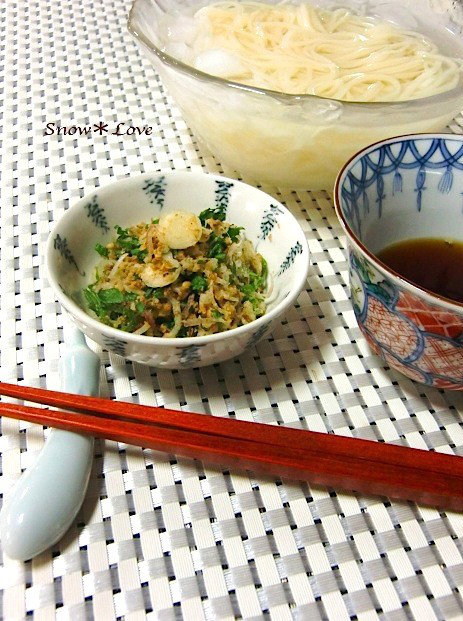

In [48]:
img